<a href="https://colab.research.google.com/github/tosincarik/Regression-Model/blob/main/MultipleLinear_ConnectKaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The project is to predict the chance of admission into university for students factoring some independent variables like;

* Gre Score
* University Rating
* SOP (Statement of Purpose)
* TOEFL score
* University Rating
* LOR (Letter of Recommendation)
* CGPA
* Research


 The Chance of admit represents the dependent variable which the model will try to preict

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!pip  install opendatasets
!pip install pandas

In [ ]:
!pip install kaggle

In [4]:
mkdir ~/.kaggle

In [6]:
cp kaggle.json ~/.kaggle/

In [5]:
import opendatasets as od

In [7]:
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
! kaggle datasets download akshaydattatraykhare/data-for-admission-in-the-university

  0% 0.00/4.29k [00:00<?, ?B/s]
100% 4.29k/4.29k [00:00<00:00, 9.85MB/s]


In [9]:
! unzip data-for-admission-in-the-university

Archive:  data-for-admission-in-the-university.zip
  inflating: adm_data.csv            


In [10]:
df_adm = pd.read_csv('adm_data.csv')

In [11]:
## Check if there are any missing values in the dataset

df_adm.isnull().values.any()

False

In [12]:
df_adm.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


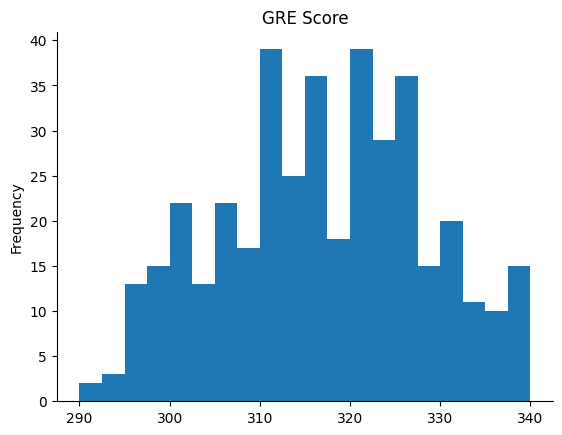

In [ ]:
# @title GRE Score

from matplotlib import pyplot as plt
df_adm['GRE Score'].plot(kind='hist', bins=20, title='GRE Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [13]:
df_adm.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [14]:
## Split the dataset and fetch the independent variables into X
X = df_adm.iloc[:, 1:-1].values
y = df_adm.iloc[:,-1].values

In [15]:
#Split the dataset into training and test sets
#Using scikit learn library , import the train test
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [ ]:
print(X_test)

### **Multiple Linear Regression**

In [ ]:
#Import the linearregression object and create an instance of the object
#Train the multiple linear regression on the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

##Predictor for Linear Regression

In [18]:
y_pred = regressor.predict(X_test)

In [ ]:
print(y_pred)

In [ ]:
print(y_test)

In [ ]:
# Comparing the results of the predicted chance of admit with the actual(real) chance of admit test set
# Set to display only in two decimal places
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1) , y_test.reshape(len(y_test),1)),1))

##Accuracy Score

In [22]:
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)

0.6537876123347577

## Polynomial Regression

In [ ]:
#convert the matrix of features of X to a polynomial matrix
from sklearn.preprocessing import PolynomialFeatures
pol_reg = PolynomialFeatures(degree=4)
pol_reg.fit_transform(X)
X_Pol = pol_reg.fit_transform(X)
pol_reg2 = LinearRegression()
pol_reg2.fit(X_Pol,y)

##Predictor for PolyRegression

In [24]:
y_pred = pol_reg2.predict(X_Pol)

In [ ]:
# Comparing the results of the predicted chance of admit with the actual(real) chance of admit test set
# Set to display only in two decimal places
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1) , y.reshape(len(y),1)),1))

In [26]:
from sklearn.metrics import r2_score
r2_score(y,y_pred)

0.908278850520977

## Conclusion
---
With multiple linear regression model, the accuracy for prediction was at 0.65%, this model was improved by using the polynimial regression and a degree of 4. This greatly improved the accuracy to 0.90% prediction accuracy for the chance of admission to the university.

